# Task 4

In [84]:
# Import Important libraries....
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [85]:
# Import dataset for operations...
dataset=pd.read_csv(r"C:\Users\ALOK BHAGWAT\Downloads\twitter_training2.csv\twitter_training.csv", header=None)
dataset

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [87]:
# Give the meaningfull names for column header 
dataset.columns=['Id','Topic','Sentiment','Text']
dataset

,Id,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [88]:
# Give index for numbers....
dataset.index.name='Index No'
dataset

,Id,Topic,Sentiment,Text
Index No,,,,
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...


In [89]:
# No of rows and columns 
dataset.shape 

(74682, 4)

In [90]:
# Gives information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [91]:
# checking for null values...
dataset.isnull().sum()

Id             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [92]:
# remove the missing rows or values 
dataset.dropna(subset=['Text'],inplace=True)
dataset

,Id,Topic,Sentiment,Text
Index No,,,,
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...


In [93]:
# check for the duplicate value....
dataset.duplicated().sum()

np.int64(2340)

In [94]:
# remove duplicates...
dataset.drop_duplicates(inplace=True)
dataset

,Id,Topic,Sentiment,Text
Index No,,,,
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...


In [95]:
# check duplicated after remove...
dataset.duplicated().sum()

np.int64(0)

In [96]:
# check null values after remove
dataset.isnull().sum()

Id           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [97]:
# Now The sentiment count...
dataset['Sentiment'].value_counts

<bound method IndexOpsMixin.value_counts of Index No
0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
74677    Positive
74678    Positive
74679    Positive
74680    Positive
74681    Positive
Name: Sentiment, Length: 71656, dtype: object>

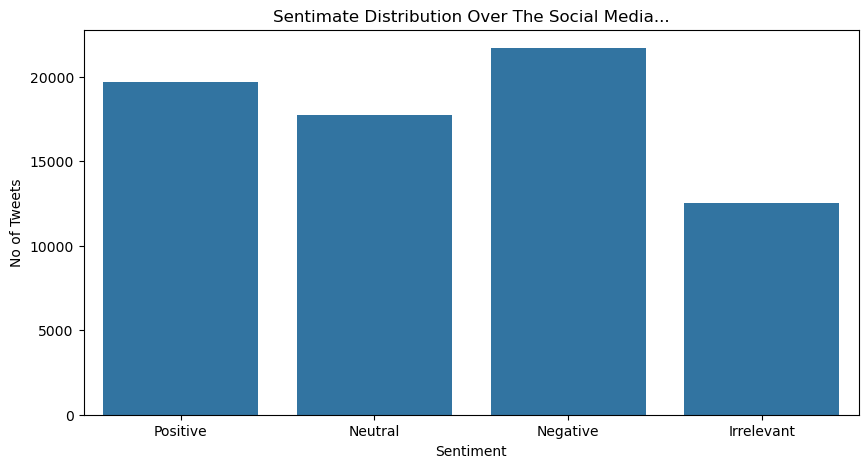

In [98]:
# Sentiment distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment',data=dataset)
plt.title('Sentimate Distribution Over The Social Media...')
plt.xlabel('Sentiment')
plt.ylabel('No of Tweets')
plt.show()

The sentiment distribution bar graph shows that negative sentiment has the highest number of tweets, indicating that users express more dissatisfaction or criticism toward the analyzed topics or brands. Positive sentiment accounts for approximately 20,000 tweets, reflecting a significant level of favorable opinion among users. Neutral sentiment is slightly lower than positive, suggesting that fewer users remain indifferent or purely informational in their posts. Additionally, irrelevant sentiment has the lowest count, which indicates that most tweets are directly related to the topics or brands being analyzed. Overall, this pattern highlights a predominantly negative public attitude, emphasizing the importance for brands to closely monitor user feedback and address negative concerns to improve public perception.

In [99]:
# Now the text cleaning ......
# make function for clean text...

def clean_text(Text):
    Text = str(Text).lower()
    Text = re.sub(r"http\S+|www\S+", "", Text)
    Text = re.sub(r"[^a-z\s]", "", Text)
    Text = " ".join(word for word in Text.split() if word not in stop_words)
    return Text



In [101]:
# Display the Text is clean 
dataset["clean_text"] = dataset["Text"].apply(clean_text)
dataset[["Text", "clean_text"]].head()


,Text,clean_text
Index No,,
0,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,I am coming to the borders and I will kill you...,coming borders kill
2,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,im coming on borderlands and i will murder you...,im coming borderlands murder
4,im getting on borderlands 2 and i will murder ...,im getting borderlands murder


In [102]:
# Now use vadar for social media sentimate analyser...
# Generate sentiment score...
dataset['sentimate_score']=dataset['clean_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [106]:
# Convert into sentiment labels...
def get_sentimate(score):
    if score>= 0.05:
        return "Positive"
    elif score<= -0.05:
        return "Negative"
    else:
        return "Neutral"

dataset['predict_sentimate']=dataset['sentimate_score'].apply(get_sentimate)

In [107]:
# Compare actual vs predicted sentimate ...
pdf_rel = dataset[dataset["Sentiment"] != "Irrelevant"]

pd.crosstab(dataset["Sentiment"], dataset["predict_sentimate"])


predict_sentimate,Negative,Neutral,Positive
Sentiment,,,
Irrelevant,4486,1992,6059
Negative,11887,3858,5953
Neutral,6094,3792,7822
Positive,3413,3249,13051


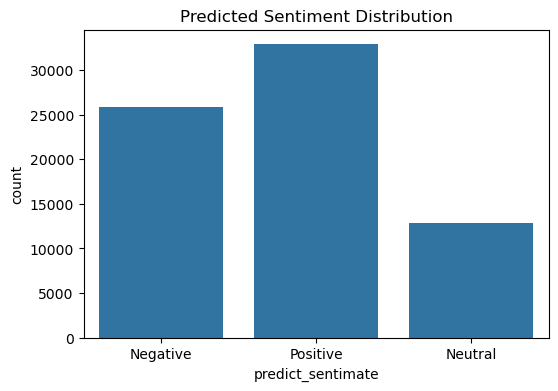

In [108]:
# Predicted sentimate distribution
plt.figure(figsize=(6,4))
sns.countplot(x="predict_sentimate", data=dataset)
plt.title("Predicted Sentiment Distribution")
plt.show()


The predicted sentiment distribution shows that Positive sentiment dominates the dataset, followed by Negative sentiment, while Neutral sentiment is comparatively lower. This indicates that users generally express more favorable opinions, but a significant portion of dissatisfaction still exists and should not be ignored.

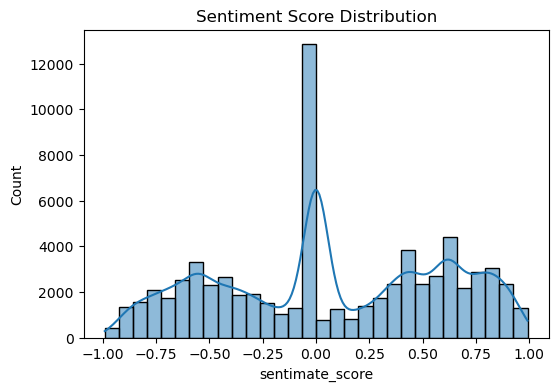

In [110]:
# Sentimate score distribution 

plt.figure(figsize=(6,4))
sns.histplot(dataset["sentimate_score"], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()


The sentiment score histogram reveals a balanced spread between negative (-1) and positive (+1) values, with a noticeable peak around zero, indicating neutral or mixed opinions.
This confirms that while strong opinions are present, many users express moderate or balanced sentiment rather than extreme emotions.

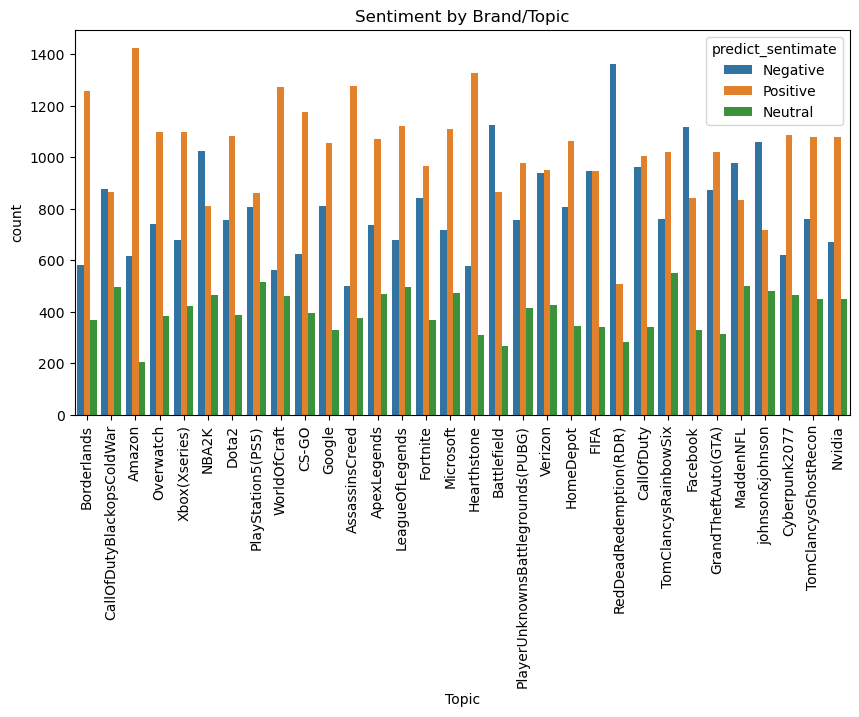

In [111]:
plt.figure(figsize=(10,5))
sns.countplot(x="Topic", hue="predict_sentimate", data=dataset )
plt.xticks(rotation=90)
plt.title("Sentiment by Brand/Topic")
plt.show()


Most brands/topics receive higher positive sentiment counts, showing strong engagement and acceptance.
Certain brands show elevated negative sentiment, which can be used to identify areas requiring improvement.
Neutral sentiment remains consistent across brands, suggesting undecided or informational discussions.

# Conclusion:


In [1]:
print("""In this task, social media data was analyzed to understand public opinion and sentiment toward different topics and brands. The dataset was first cleaned by removing missing values, duplicate records, and irrelevant noise from the text, ensuring the data was suitable for analysis. Text preprocessing techniques such as lowercasing, 
stopword removal, and elimination of URLs and special characters were applied to improve the quality of the textual data.Sentiment analysis was performed using the VADER sentiment analyzer, which is well-suited for short and informal social media content. Tweets were classified into positive, negative, and neutral categories based on their
sentiment scores. Irrelevant tweets were excluded from polarity comparison, as they do not represent sentiment orientation.The visualizations revealed that negative sentiment dominates the dataset, indicating a higher level of dissatisfaction or criticism among users. Positive sentiment also shows a significant presence, reflecting favorable 
opinions, while neutral sentiment represents users with informational or balanced views. Irrelevant tweets were minimal, suggesting that most tweets were related to the analyzed topics.Overall, this analysis demonstrates how sentiment analysis can effectively capture public attitudes on social media. The results highlight the importance for 
brands and organizations to monitor online feedback, identify negative trends, and take data-driven actions to improve customer perception and engagement.""")

In this task, social media data was analyzed to understand public opinion and sentiment toward different topics and brands. The dataset was first cleaned by removing missing values, duplicate records, and irrelevant noise from the text, ensuring the data was suitable for analysis. Text preprocessing techniques such as lowercasing, 
stopword removal, and elimination of URLs and special characters were applied to improve the quality of the textual data.Sentiment analysis was performed using the VADER sentiment analyzer, which is well-suited for short and informal social media content. Tweets were classified into positive, negative, and neutral categories based on their
sentiment scores. Irrelevant tweets were excluded from polarity comparison, as they do not represent sentiment orientation.The visualizations revealed that negative sentiment dominates the dataset, indicating a higher level of dissatisfaction or criticism among users. Positive sentiment also shows a significant presence, r